# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings

warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)


%matplotlib inline

ModuleNotFoundError: No module named 'requests'

In [ ]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
#my_btc = float(my_btc)
#my_eth = float(my_eth)

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [ ]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()
btc_value = my_btc['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
my_eth = requests.get(eth_url).json()
eth_value = my_eth['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = 1.2 * btc_value
my_eth_value = 5.3 * eth_value 
portfolio_value= btc_value + eth_value
# Print current crypto wallet balance
print(f"The current value of your {'my btc'} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {'my eth'} ETH is ${my_eth_value:0.2f}")

The current value of your my btc BTC is $73188.00
The current value of your my eth ETH is $15712.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
api_key= os.getenv("ALPACA_API_KEY")
api_secret= os.getenv("ALPACA_SECRET_KEY")
#alpaca_endpoint = os.getenv("ALPACA_ENDPOINT")
api = tradeapi.REST(api_key, api_secret, api_version="v2")
#base_url = alpaca_endpoint

In [ ]:
# Format current date as ISO format
start_date = pd.Timestamp("2024-04-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2024-04-19", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stockticker= api.get_bars(tickers, timeframe, start= start_date, end= end_date).df
# Separate ticker data
AGG = stockticker[stockticker['symbol']=='AGG'].drop(columns='symbol', axis=1)
SPY = stockticker[stockticker['symbol']=='SPY'].drop(columns='symbol', axis=1)

# Concatenate the ticker DataFrames
#concatenated_df = pd.concat([agg_df, agg_df])
portfolio_concat_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
portfolio_concat_df

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2024-04-19 04:00:00+00:00  95.38  95.55  95.33       25285  95.53  9121718   

                                         SPY                               \
                                vwap   close     high     low trade_count   
timestamp                                                                   
2024-04-19 04:00:00+00:00  95.407918  495.16  500.455  493.86      756686   

                                                          
                             open     volume        vwap  
timestamp                                                 
2024-04-19 04:00:00+00:00  499.44  102212587  496.836977

In [ ]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_concat_df['AGG']['close'].values[0]
spy_close_price = portfolio_concat_df['SPY']['close'].values[0]

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.38
Current SPY closing price: $495.16


In [ ]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24758.00
The current value of your 200 AGG shares is $19076.00


### Savings Health Analysis

In [ ]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income= 1200
# Consolidate financial assets data
# YOUR CODE HERE!
total_crpto_value= my_btc_value + my_eth_value
total_shares_value= my_agg_value + my_spy_value
savings_data = [total_crpto_value, total_shares_value]
# Create savings DataFrame
# YOUR CODE HERE!
savings_df= pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])
# Display savings DataFrame
display(savings_df)

,amount
crypto,88900.592
stock/bond,43834.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

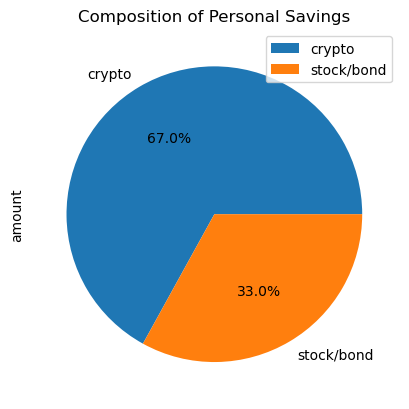

In [ ]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title='Composition of Personal Savings', autopct='%1.1f%%')


In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_portfolio_value = savings_df['amount'].sum()

# Validate saving health
# YOUR CODE HERE!
if total_portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio_value == emergency_fund:
    print("Congratulations on reaching this important financial goal.")
else:
    shortfall = emergency_fund - total_portfolio_value
    print(f"You are ${shortfall} away from reaching your emergency fund")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-04-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp("2024-04-19", tz="America/New_York").isoformat()
#five_year_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
#five_year_df

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
five_yr_df = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
fiveyr_spy_df = five_yr_df[five_yr_df['symbol']=='SPY'].drop(columns='symbol', axis=1)
fiveyr_agg_df = five_yr_df[five_yr_df['symbol']=='AGG'].drop(columns='symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
fiveyr_stock_data = pd.concat([fiveyr_spy_df, fiveyr_agg_df], axis=1, keys=['SPY', 'AGG'])

# Display sample data
fiveyr_stock_data.head()


SPY                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2019-04-22 04:00:00+00:00  290.30  290.435  289.0700      170763  289.17   
2019-04-23 04:00:00+00:00  292.89  293.140  290.4200      232021  290.68   
2019-04-24 04:00:00+00:00  292.21  293.160  292.0700      203854  292.79   
2019-04-25 04:00:00+00:00  292.13  292.780  290.7300      238260  292.12   
2019-04-26 04:00:00+00:00  293.41  293.490  291.2401      220440  292.10   

                                                    AGG                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2019-04-22 04:00:00+00:00  41438319  290.010232  108.06  108.16  108.05   
2019-04-23 04:00:00+00:00  53717869  292.120861  108.25  108.28  108.15   
2019-04-24 04:00:00+00:00  51150196  292.575376  108.50  108.53  108.42   
2019-04-25 04:00:00+00:00  59111801  292.051817  108.49  108.55  108.42   
2019-04-26 04:00:00+00:00  51864349  292.620073  108.71  108.75  108.66   

                                                                      
                          trade_count      open   volume        vwap  
timestamp                                                             
2019-04-22 04:00:00+00:00        9161  108.1300  5830321  108.098194  
2019-04-23 04:00:00+00:00       10780  108.1800  3660025  108.237579  
2019-04-24 04:00:00+00:00       10193  108.4200  3275388  108.497077  
2019-04-25 04:00:00+00:00        9122  108.4699  3545283  108.478026  
2019-04-26 04:00:00+00:00        8663  108.7400  2811966  108.706248

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim = MCSimulation(
    portfolio_data = fiveyr_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*30)



In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_sim.portfolio_data.head()


SPY                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2019-04-22 04:00:00+00:00  290.30  290.435  289.0700      170763  289.17   
2019-04-23 04:00:00+00:00  292.89  293.140  290.4200      232021  290.68   
2019-04-24 04:00:00+00:00  292.21  293.160  292.0700      203854  292.79   
2019-04-25 04:00:00+00:00  292.13  292.780  290.7300      238260  292.12   
2019-04-26 04:00:00+00:00  293.41  293.490  291.2401      220440  292.10   

                                                                 AGG          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2019-04-22 04:00:00+00:00  41438319  290.010232          NaN  108.06  108.16   
2019-04-23 04:00:00+00:00  53717869  292.120861     0.008922  108.25  108.28   
2019-04-24 04:00:00+00:00  51150196  292.575376    -0.002322  108.50  108.53   
2019-04-25 04:00:00+00:00  59111801  292.051817    -0.000274  108.49  108.55   
2019-04-26 04:00:00+00:00  51864349  292.620073     0.004382  108.71  108.75   

                                                                              \
                              low trade_count      open   volume        vwap   
timestamp                                                                      
2019-04-22 04:00:00+00:00  108.05        9161  108.1300  5830321  108.098194   
2019-04-23 04:00:00+00:00  108.15       10780  108.1800  3660025  108.237579   
2019-04-24 04:00:00+00:00  108.42       10193  108.4200  3275388  108.497077   
2019-04-25 04:00:00+00:00  108.42        9122  108.4699  3545283  108.478026   
2019-04-26 04:00:00+00:00  108.66        8663  108.7400  2811966  108.706248   

                                        
                          daily_return  
timestamp                               
2019-04-22 04:00:00+00:00          NaN  
2019-04-23 04:00:00+00:00     0.001758  
2019-04-24 04:00:00+00:00     0.002309  
2019-04-25 04:00:00+00:00    -0.000092  
2019-04-26 04:00:00+00:00     0.002028

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007972,1.006426,1.007389,0.991761,0.992242,0.997110,0.995841,0.992813,1.006629,1.004812,...,1.005751,0.996204,1.006117,0.989462,1.004772,1.006989,1.005515,0.989538,1.002247,0.997925
2,1.009616,1.007479,1.010367,0.984814,0.991369,1.013545,0.994083,0.989002,0.997179,1.003182,...,1.006656,1.006709,1.010144,0.976406,0.996684,1.023009,1.006047,0.990445,1.004991,0.985164
3,0.995926,1.008053,0.995250,0.996331,0.996560,1.011819,0.996990,0.985281,0.998122,1.006250,...,1.001760,1.019459,1.018302,0.992769,0.992946,1.012554,1.002469,0.982747,0.999412,0.986099
4,0.999631,1.002273,1.004424,0.995370,1.003860,1.019108,1.014108,0.979631,0.990713,1.021588,...,0.983451,1.023047,1.019128,0.989098,0.984933,1.017549,1.006844,0.988654,0.994581,0.977806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.730663,14.208988,9.515123,3.268976,11.761815,10.898815,3.080229,8.812164,19.779038,5.241419,...,3.121779,2.182341,6.868105,6.867730,4.369060,9.990468,4.141281,4.251308,11.759423,5.201964
7557,9.682086,14.330550,9.571112,3.243061,11.939347,10.954646,3.010852,8.855760,19.825225,5.254987,...,3.146069,2.199558,6.881711,6.929550,4.459342,9.967879,4.153872,4.262886,11.828491,5.138127
7558,9.599855,14.375574,9.621223,3.259356,12.076598,10.970721,3.000548,8.875933,19.688759,5.181866,...,3.158485,2.185572,6.903773,6.963350,4.466657,10.076609,4.189530,4.260570,11.887369,5.272735
7559,9.620807,14.543859,9.515482,3.284437,11.936441,10.908897,2.978572,8.922019,19.559374,5.199398,...,3.157281,2.224883,6.916458,6.955391,4.481445,10.225122,4.251884,4.234404,11.962416,5.276448


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

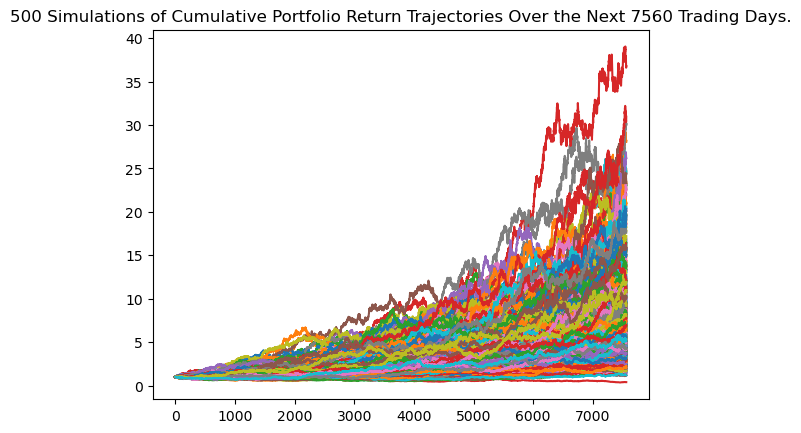

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_sim.plot_simulation()


<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

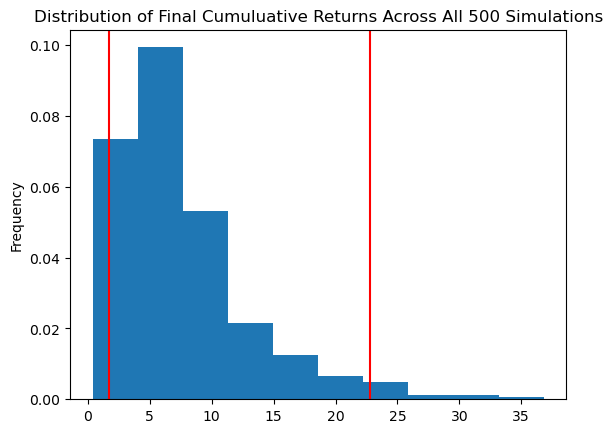

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
mc_sim.plot_distribution()


### Retirement Analysis

In [ ]:
#from MCForecastTools import MCSimulation
help(MCSimulation)

Help on class MCSimulation in module MCForecastTools:

class MCSimulation(builtins.object)
 |  MCSimulation(portfolio_data, weights='', num_simulation=1000, num_trading_days=252)
 |  
 |  A Python class for runnning Monte Carlo simulation on portfolio price data. 
 |  
 |  ...
 |  
 |  Attributes
 |  ----------
 |  portfolio_data : pandas.DataFrame
 |      portfolio dataframe
 |  weights: list(float)
 |      portfolio investment breakdown
 |  nSim: int
 |      number of samples in simulation
 |  nTrading: int
 |      number of trading days to simulate
 |  simulated_return : pandas.DataFrame
 |      Simulated data from Monte Carlo
 |  confidence_interval : pandas.Series
 |      the 95% confidence intervals for simulated final cumulative returns
 |  
 |  Methods defined here:
 |  
 |  __init__(self, portfolio_data, weights='', num_simulation=1000, num_trading_days=252)
 |      Constructs all the necessary attributes for the MCSimulation object.
 |      
 |      Parameters
 |      -------

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
#summary_stats = mc_sim.summarize_cumulative_return()
summary_stats = mc_sim.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")